C:\Users\bkrmp\AppData\Local\Temp\ipykernel_12800\3242589754.py:19: RuntimeWarning: divide by zero encountered in divide
  ndwi = (green_band - nir_band) / (green_band + nir_band)


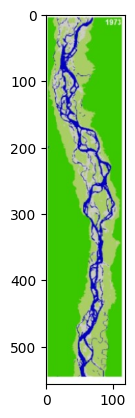

c:\Users\bkrmp\Desktop\River Monitor\env\lib\site-packages\rasterio\__init__.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


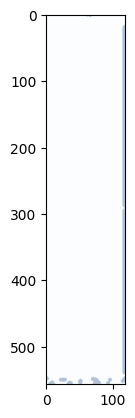

In [3]:
# Import necessary libraries
from skimage.morphology import binary_opening, disk
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.windows import Window

# Open the remotely sensed image file using Rasterio
image_file = "dataset/1.jpg"
with rio.open(image_file) as src:
    image = src.read()

# Extract the necessary bands for NDWI calculation (Green and NIR)
green_band = image[0, :, :]
nir_band = image[2, :, :]

# Calculate NDWI using the extracted bands
ndwi = (green_band - nir_band) / (green_band + nir_band)

# Set threshold values for channel identification
threshold_min = -0.1
threshold_max = 0.1

# Apply thresholding to the NDWI image to identify channel pixels
channel_mask = np.logical_and(ndwi > threshold_min, ndwi < threshold_max)

# Apply morphological operations to clean up the channel mask
selem = disk(3)
channel_mask_clean = binary_opening(channel_mask, selem)

# Visualize the channel mask on the original image
show(image, cmap='gray')
plt.imshow(channel_mask_clean, cmap='Blues', alpha=0.3)

# Save the channel mask as a new raster file
with rio.open("channel_mask.tif", 'w', driver='GTiff', width=src.width, height=src.height, count=1, dtype=rio.uint8) as dst:
    dst.write(channel_mask_clean.astype(rio.uint8), 1)
